In [1]:
%matplotlib notebook

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.ma as ma

import os

In [3]:
def Q2th (deg,lam): # function to convert 2theta into scattering vector, Q
	
	return 4.0*np.pi*np.sin(deg/360.0*np.pi)/lam

In [4]:
d1p5K = np.loadtxt('PND_ILL_CrCl2pym_1p5K.xye')
d30K = np.loadtxt('PND_ILL_CrCl2pym_30K.xye')
err = np.sqrt((d1p5K[:,2])**2 + (d30K[:,2])**2)

<IPython.core.display.Javascript object>


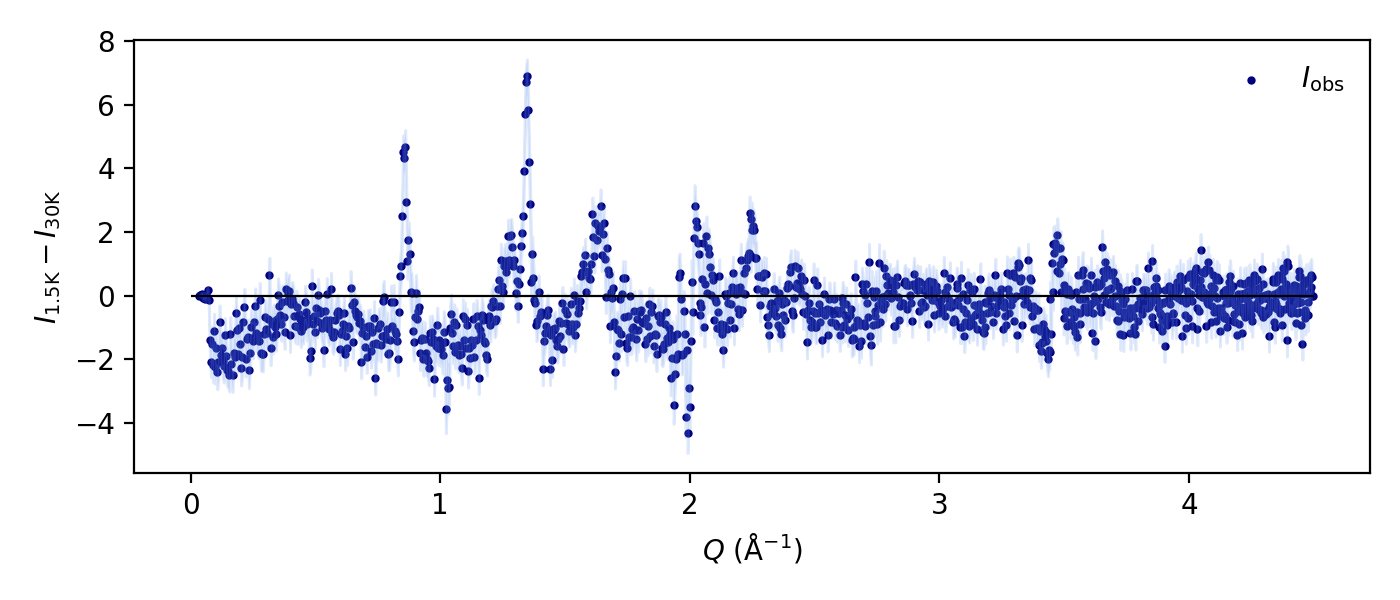

In [5]:
fig = plt.figure(1, figsize=(7, 3))
ax1 = plt.subplot()

dQ = Q2th(d1p5K[:,0],2.52)


plt.scatter(dQ,d1p5K[:,1]-d30K[:,1], label='$I_{\mathrm{obs}}$', color='navy', s=4)

plt.fill_between(dQ, d1p5K[:,1]-d30K[:,1] - err, d1p5K[:,1]-d30K[:,1] + err, color='cornflowerblue', alpha=0.2)

plt.hlines(0,0,4.5, color='k', linewidth=0.8)

ax1.set_xlabel(r'$\mathit{Q}$ (Å$^{-1}$)')
ax1.set_ylabel('$I_{\mathrm{1.5 K}}-I_{\mathrm{30 K}}$')
#ax1.set_xlim((0.45,4.5))
#ax1.set_ylim((0,16000))
plt.legend(frameon=False, loc='upper right')
#plt.savefig('CrCl2pym_.pdf' ,bbox_inches='tight') #The output of your plot as an image or a pdf
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


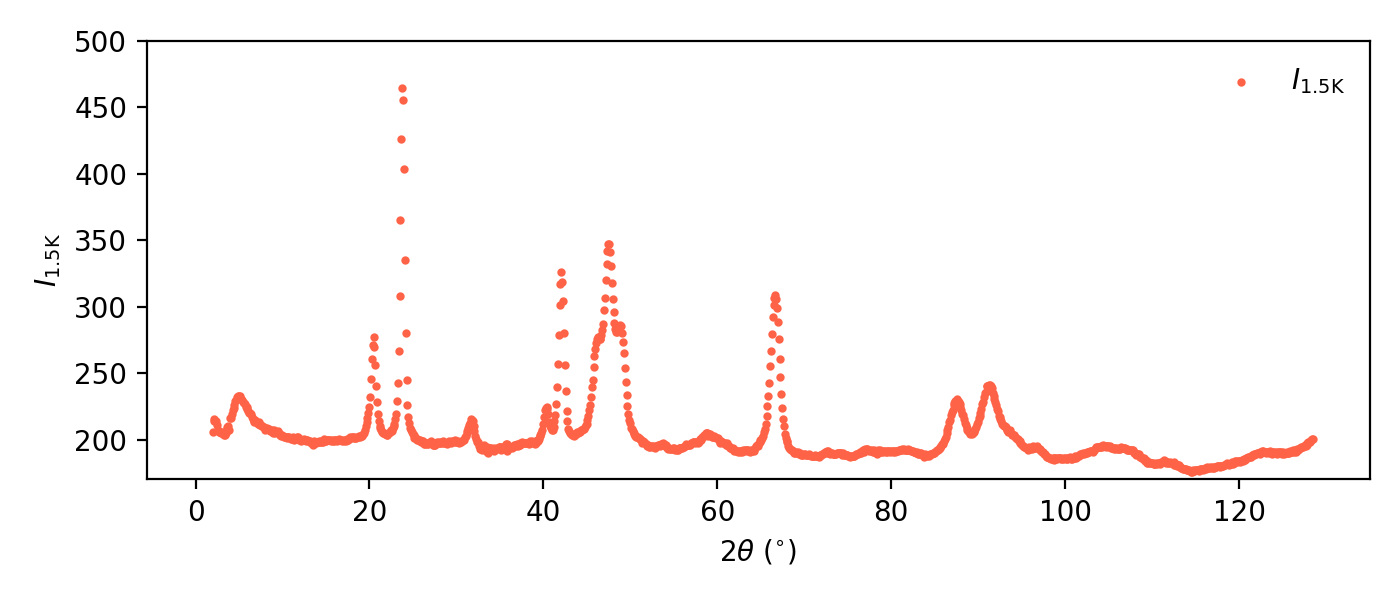

In [6]:
fig = plt.figure(3, figsize=(7, 3))
ax1 = plt.subplot()

plt.scatter(d1p5K[:,0],d1p5K[:,1], label='$I_{\mathrm{1.5K}}$', color='tomato', s=4)

ax1.set_xlabel(r'$2 \theta$ ($^{\circ}$)')
ax1.set_ylabel('$I_{\mathrm{1.5 K}}$')

#ax1.set_xlim((0.45,4.5))
ax1.set_ylim((170,500))
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


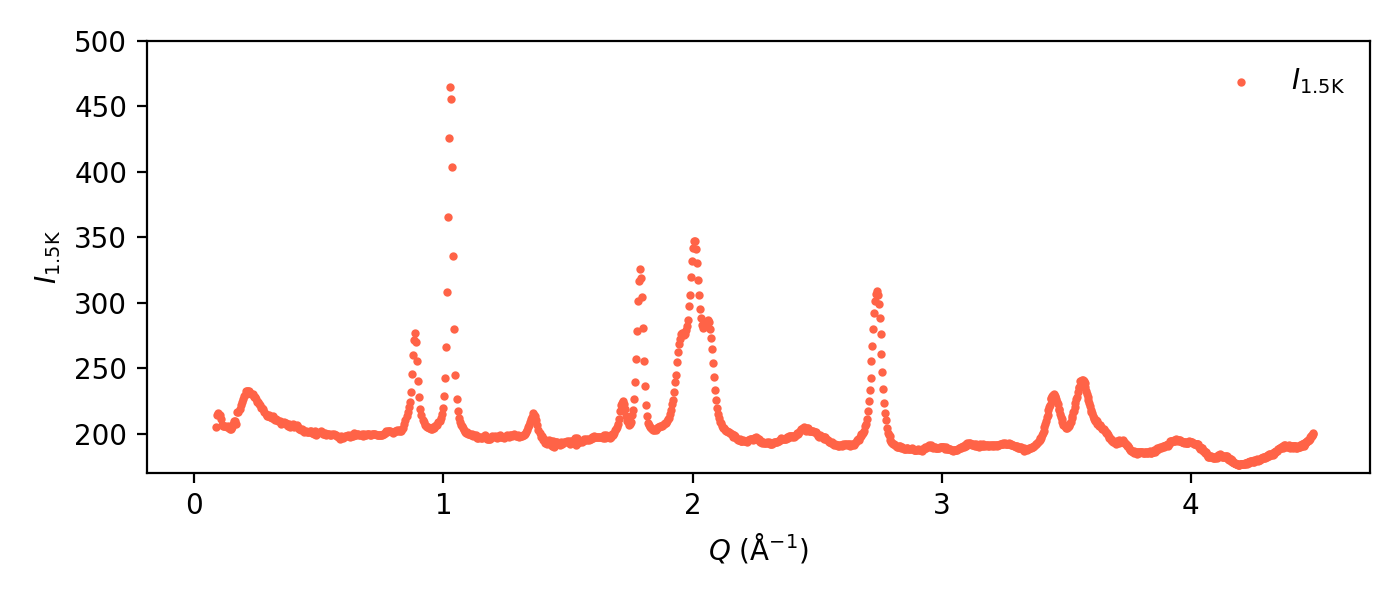

In [7]:
fig = plt.figure(4, figsize=(7, 3))
ax2 = plt.subplot()

d1p5KQ = Q2th(d1p5K[:,0],2.52)

plt.scatter(d1p5KQ,d1p5K[:,1], label='$I_{\mathrm{1.5 K}}$', color='tomato', s=4)
#ax2.set_xlim((0.45,4.5))
ax2.set_ylim((170,500))

ax2.set_xlabel(r'$\mathit{Q}$ (Å$^{-1}$)')
ax2.set_ylabel('$I_{\mathrm{1.5 K}}$')
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


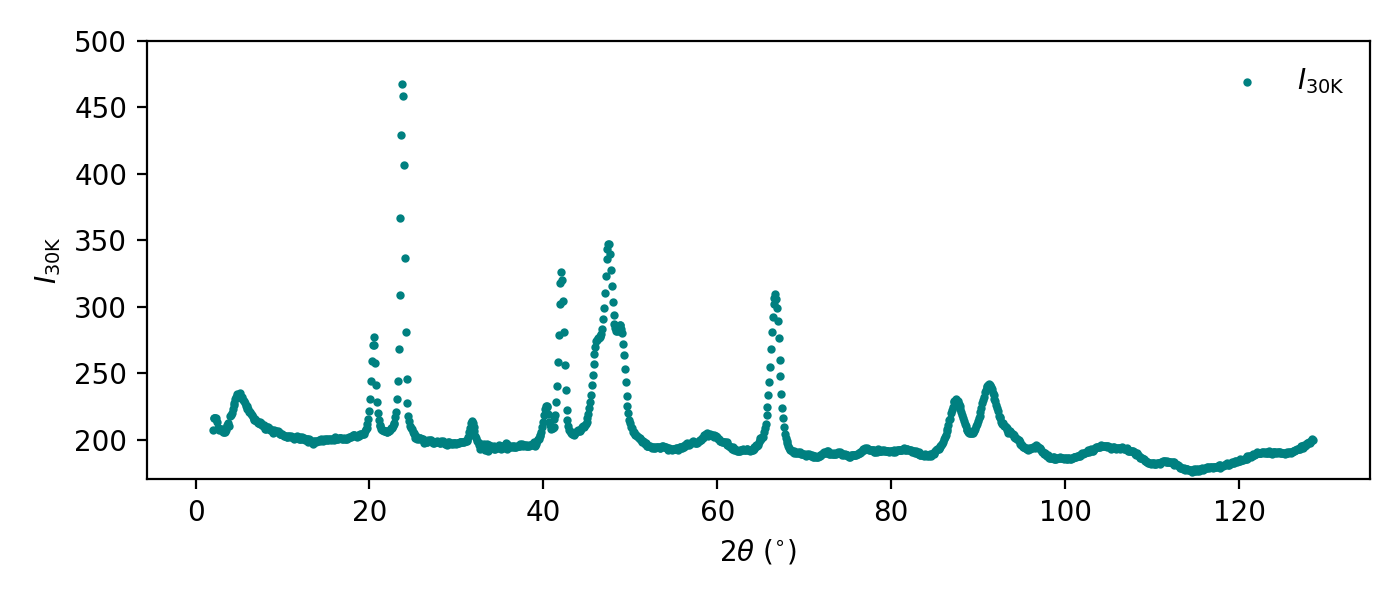

In [8]:
fig = plt.figure(5, figsize=(7, 3))
ax1 = plt.subplot()

plt.scatter(d30K[:,0],d30K[:,1], label='$I_{\mathrm{30K}}$', color='teal', s=4)

ax1.set_xlabel(r'$2 \theta$ ($^{\circ}$)')
ax1.set_ylabel('$I_{\mathrm{30 K}}$')

#ax1.set_xlim((0.45,4.5))
ax1.set_ylim((170,500))
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


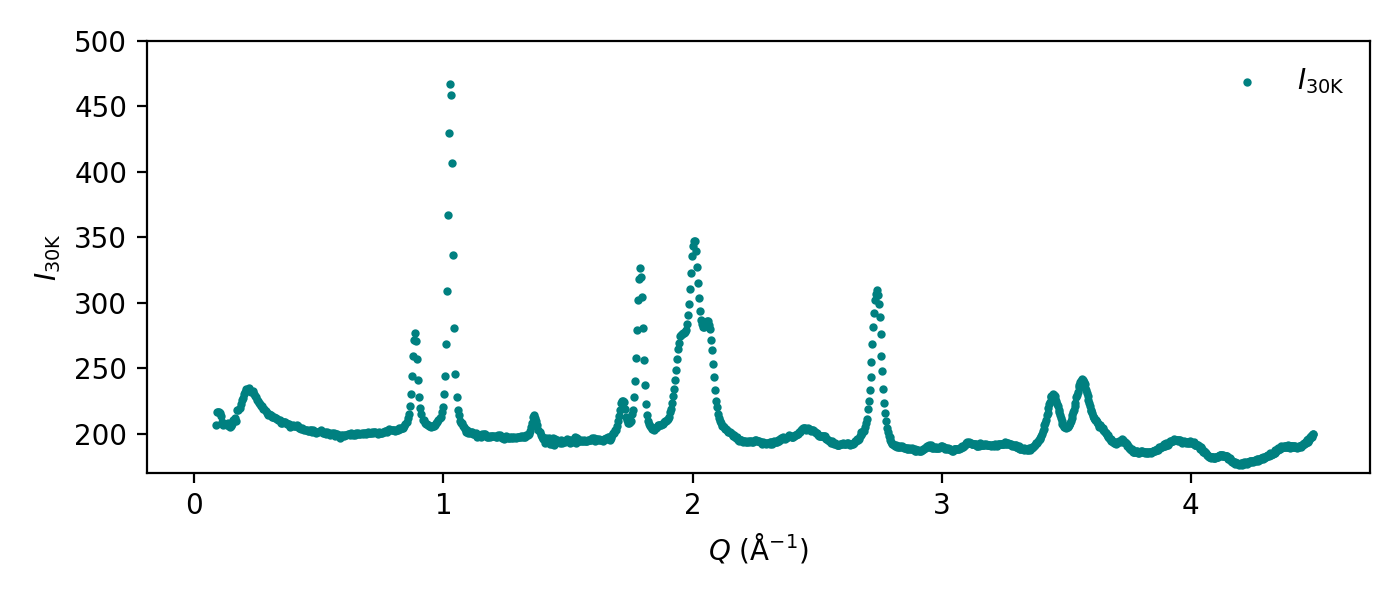

In [9]:
fig = plt.figure(6, figsize=(7, 3))
ax2 = plt.subplot()

d30KQ = Q2th(d1p5K[:,0],2.52)

plt.scatter(d30KQ,d30K[:,1], label='$I_{\mathrm{30 K}}$', color='teal', s=4)
#ax2.set_xlim((0.45,4.5))
ax2.set_ylim((170,500))

ax2.set_xlabel(r'$\mathit{Q}$ (Å$^{-1}$)')
ax2.set_ylabel('$I_{\mathrm{30 K}}$')
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

In [10]:
data = np.loadtxt('PND_ILL_CrCl2pym_30K_riet_final.dat') #PXRD data file which has been converted to .dat or .xy
rug = np.genfromtxt('PND_ILL_CrCl2pym_30K_riet_final_rug_marks.dat')

<IPython.core.display.Javascript object>


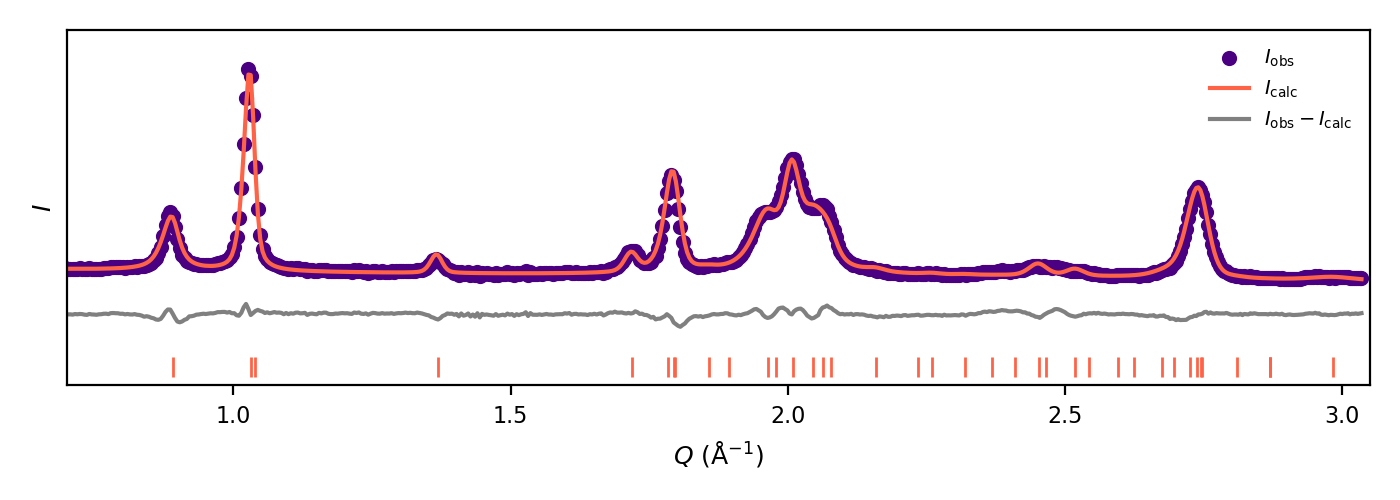

In [15]:
fig = plt.figure(100, figsize=(7, 2.5))
ax1 = plt.subplot()

Q = 4*np.pi*np.sin(data[:,0]/2/180*np.pi)/2.52

obs = ax1.scatter (Q,data[:,1]-70, s=20, label='$I_{obs}$', color='indigo')
calc, = ax1.plot (Q,data[:,2]-70, linewidth=1.5, label='$I_{calc}$', color='tomato')
diff, = ax1.plot (Q,data[:,3]+70, linewidth=1.5, label='$I_{obs}$-$I_{calc}$', color='grey')
ax1.plot(rug[:,4], ([0]*len(rug)), '|', ms=7, c='tomato')

ax1.set_xlabel('$Q$ (Å$^{-1}$)', fontsize=9)
ax1.set_ylabel('$I$', fontsize=9)
ax1.set_xlim((0.7,3.05))
ax1.set_ylim((-25,450))
plt.yticks([])
plt.xticks(fontsize=8)
ax1.tick_params(axis='both', labelsize=8)
ax1.legend([obs, calc, diff],['$I_{\mathrm{obs}}$','$I_{\mathrm{calc}}$','$I_{\mathrm{obs}}-I_{\mathrm{calc}}$'], frameon=False, loc='upper right', fontsize=7)
plt.tight_layout()
plt.savefig('PND_sicogi_riet.pdf', bbox_inches='tight', transparent=True) #The output of your plot as an image or a pdf
plt.show()

In [29]:
riet = np.genfromtxt('PND_ILL_CrCl2pym_mag_mY1_final.dat')

stop = np.argmax(riet[:,0]>44.8)
restart = np.argmax(riet[:,0]>50.1)

start = np.argmax(d1p5K[:,0]>8.9)
dstop = np.argmax(d1p5K[:,0]>44.8)
drestart = np.argmax(d1p5K[:,0]>50.1)
finish = np.argmax(d1p5K[:,0]>75)

rieta = riet[0:stop,:]
rietb = riet[restart:,:]
riet = np.concatenate((rieta, rietb))

erra = err[start:dstop]
errb = err[drestart:finish]
error = np.concatenate((erra, errb))


In [30]:
rug = np.genfromtxt('PND_ILL_CrCl2pym_mag_mY1_final_rug_marks.dat')

<IPython.core.display.Javascript object>


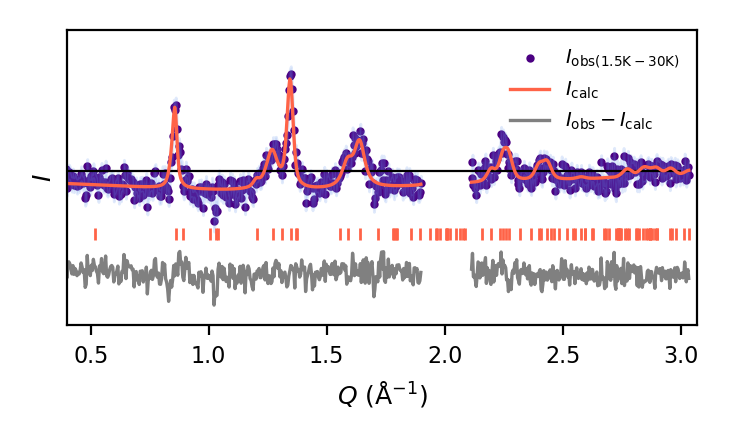

In [31]:
fig = plt.figure(2, figsize=(3.65, 2.2))
ax1 = plt.subplot()

#riet = ma.masked_inside(riet,start,stop)

x = Q2th(riet[:,0],2.52)
xa = Q2th(rieta[:,0],2.52)
xb = Q2th(rietb[:,0],2.52)

obs = ax1.scatter (x,riet[:,1]+5, s=4, label='$I_{\mathrm{obs} (1.5\mathrm{K}-30\mathrm{K})}$', color='indigo')

#plt.fill_between(x, (riet[:,1] - error)+5, (riet[:,1] + error)+5, color='cornflowerblue', alpha=0.2)
plt.fill_between(xa, (rieta[:,1] - erra)+5, (rieta[:,1] + erra)+5, color='cornflowerblue', alpha=0.2)
plt.fill_between(xb, (rietb[:,1] - errb)+5, (rietb[:,1] + errb)+5, color='cornflowerblue', alpha=0.2)

calc, = ax1.plot (xa, rieta[:,2]+5, linewidth=1.2, label='$I_{\mathrm{calc}}$', color='tomato')
ax1.plot (xb,rietb[:,2]+5, linewidth=1.2, color='tomato')

diff, = ax1.plot (xa,rieta[:,3]-2.3, linewidth=1.2, label='$I_{\mathrm{obs}}-I_{\mathrm{calc}}$', color='grey')
ax1.plot (xb,rietb[:,3]-2.3, linewidth=1.2, color='grey')
ax1.plot(rug[:,4], ([0.5]*len(rug)), '|',ms=4, c='tomato')

plt.hlines(5,0,3, color='k', linewidth=0.8)
#ax1.set_title('$I_{\mathrm{1.5 K}}-I_{\mathrm{30 K}}$')
ax1.set_xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
ax1.set_ylabel('$I$',fontsize=9)
ax1.set_xlim((0.4,3.07))
ax1.set_ylim((-6,15))
#ax1.set_yticklabels([])
plt.yticks(ticks=[], labels=[])
plt.xticks([0.5,1,1.5,2,2.5,3],fontsize=8)
ax1.legend([obs, calc, diff],['$I_{\mathrm{obs} (1.5\mathrm{K}-30\mathrm{K})}$','$I_{\mathrm{calc}}$','$I_{\mathrm{obs}}-I_{\mathrm{calc}}$'], frameon=False, loc='upper right',fontsize=7)
plt.tight_layout()
plt.savefig('PND_sicogi_mag_riet.pdf', bbox_inches='tight', transparent=True) #The output of your plot as an image or a pdf
#plt.savefig('PND_sicogi_mag_riet_large.pdf', bbox_inches='tight')
plt.show()